In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr, ttest_ind, f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import KFold
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Load the dataset
data = pd.read_csv('preprocessed_data.csv')
numerical_columns = ['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
                    'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION',
                    'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'GENDER', 'WORK_LIFE_BALANCE_SCORE',
                    'AGE_21 to 35', 'AGE_36 to 50', 'AGE_51 or more', 'AGE_Less than 20']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [3]:
data

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE,AGE_21 to 35,AGE_36 to 50,AGE_51 or more,AGE_Less than 20
0,0.053598,-0.578838,-0.976195,-0.178885,-1.732447,-0.477639,-0.726028,-1.466526,-0.834747,0.096801,...,-1.639980,-0.553986,-1.218878,-0.408870,0.787532,-1.271734,-0.786906,1.559214,-0.519069,-0.358502
1,-0.639571,0.152309,-0.372295,-0.883050,0.735227,1.142280,0.362605,-0.386337,1.197968,-0.284294,...,0.609763,-0.877659,-0.486065,-0.077357,0.787532,-0.247710,-0.786906,1.559214,-0.519069,-0.358502
2,-0.639571,0.152309,-0.674245,-0.530967,-0.498610,1.142280,-0.363150,-0.386337,1.197968,-1.427581,...,0.609763,-0.553986,1.712376,-1.071895,0.787532,-0.780824,-0.786906,1.559214,-0.519069,-0.358502
3,0.053598,0.152309,1.439404,-0.883050,1.352145,0.170329,-0.726028,1.233946,1.197968,-1.046485,...,-1.639980,-0.230312,-0.486065,-2.066433,0.787532,-0.978521,-0.786906,-0.641349,1.926527,-0.358502
4,1.439936,-1.309984,-0.674245,-0.883050,1.352145,-0.801622,-0.726028,0.693851,1.197968,-0.284294,...,0.609763,0.740708,-0.852472,-0.408870,0.787532,-0.063341,-0.786906,-0.641349,1.926527,-0.358502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,0.053598,0.152309,-1.580094,-0.530967,-1.732447,1.142280,-1.451783,0.693851,1.197968,0.858992,...,-1.639980,-0.230312,-0.486065,-0.408870,0.787532,-0.494275,-0.786906,-0.641349,1.926527,-0.358502
15968,0.053598,0.152309,0.231605,0.877362,0.426768,-0.801622,0.725482,0.153757,-0.834747,0.477896,...,0.609763,1.388055,0.613156,0.585668,0.787532,1.069528,1.270799,-0.641349,-0.519069,-0.358502
15969,0.746767,0.152309,-1.580094,1.581527,1.352145,0.494312,0.725482,1.233946,-0.834747,0.477896,...,0.609763,1.388055,-0.852472,1.248693,-1.269789,1.107290,1.270799,-0.641349,-0.519069,-0.358502
15970,-1.332741,-1.309984,1.439404,0.877362,-1.115529,0.170329,-0.363150,-0.386337,-0.834747,0.096801,...,0.609763,-1.525007,0.979562,0.585668,0.787532,0.338717,1.270799,-0.641349,-0.519069,-0.358502


In [9]:
column_name = 'WORK_LIFE_BALANCE_SCORE'

print(f"Min value of '{column_name}' is: {data[column_name].min()}")
print(f"Max value of '{column_name}' is: {data[column_name].max()}")

# # Calculate the range of the specified column
# column_range = data[column_name].max() - data[column_name].min()

# print(f"The range of '{column_name}' is: {column_range}")

Min value of 'WORK_LIFE_BALANCE_SCORE' is: -4.148331760926778
Max value of 'WORK_LIFE_BALANCE_SCORE' is: 3.4085684256615605


### Step 1: Visualizations

### Pairs to visualize relationship among them:
#### DAILY_STRESS and SLEEP_HOURS: Investigate whether higher stress levels are associated with reduced sleep hours.

#### FRUITS_VEGGIES and BMI_RANGE: Explore the relationship between fruit and vegetable consumption and BMI range.

#### DAILY_STEPS and BMI_RANGE: Analyze the association between daily steps and BMI range.

#### SUPPORTING_OTHERS and SOCIAL_NETWORK: Investigate the connection between supporting others and the size of an individual's social network.

#### PERSONAL_AWARDS and ACHIEVEMENT: Explore the relationship between personal awards and achievement levels.

#### TIME_FOR_PASSION and WORK_LIFE_BALANCE_SCORE: Analyze the association between time spent on personal passions and overall work-life balance scores.

#### PLACES_VISITED and CORE_CIRCLE: Investigate the connection between the number of places visited and the size of an individual's core circle of friends.

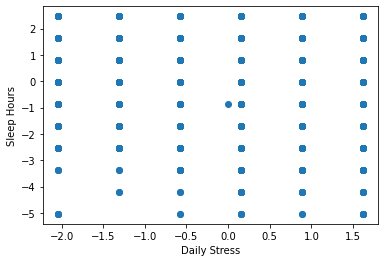

In [12]:
# Scatter plots to visualize relationships between variables:
plt.scatter(data['DAILY_STRESS'], data['SLEEP_HOURS'])
plt.xlabel('Daily Stress')
plt.ylabel('Sleep Hours')
plt.show()

<!-- Based on the plot, it seems there is no strong relationship between the two variables.

Here are some observations based on the scatter plot:

There is a concentration of data points around moderate levels of 'DAILY_STRESS' and a wide range of 'SLEEP_HOURS', indicating that people with different sleep durations experience similar levels of daily stress.

A few data points with higher 'DAILY_STRESS' have lower 'SLEEP_HOURS', suggesting that some individuals experiencing high stress may have reduced sleep durations. However, there are also data points with higher 'DAILY_STRESS' and longer 'SLEEP_HOURS', indicating that this relationship is not consistent.

Some individuals with low 'DAILY_STRESS' have both short and long 'SLEEP_HOURS', suggesting that sleep duration alone may not be a significant factor in determining stress levels.

In summary, the scatter plot does not show a strong relationship between 'DAILY_STRESS' and 'SLEEP_HOURS'. -->

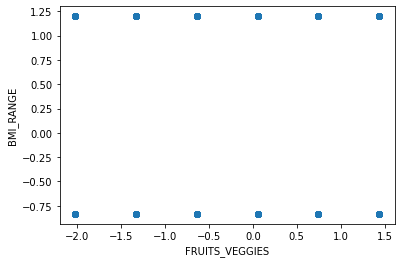

In [13]:
# Scatter plots to visualize relationships between variables:
plt.scatter(data['FRUITS_VEGGIES'], data['BMI_RANGE'])
plt.xlabel('FRUITS_VEGGIES')
plt.ylabel('BMI_RANGE')
plt.show()

<!-- Based on the plot, it seems there is a weak negative relationship between the two variables.

The data points are spread throughout the plot, but there is a slight downward trend.

Here are some observations based on the scatter plot:

There is a concentration of data points around moderate levels of 'FRUITS_VEGGIES' consumption and a wide range of 'BMI_RANGE'. 
This indicates that people with different BMI ranges consume similar levels of fruits and vegetables.

Some data points with higher 'FRUITS_VEGGIES' consumption are associated with lower 'BMI_RANGE' values. This suggests that, 
for some individuals, higher fruit and vegetable consumption may be linked to lower BMI values. However, the relationship is 
not very strong, and there are also data points with high 'FRUITS_VEGGIES' consumption and high 'BMI_RANGE' values.

There are data points with low 'FRUITS_VEGGIES' consumption across the entire 'BMI_RANGE' spectrum, suggesting that fruit 
and vegetable consumption alone may not be a significant factor in determining BMI range.

In summary, the scatter plot shows a weak negative relationship between 'FRUITS_VEGGIES' and 'BMI_RANGE'. It is possible 
that other factors, such as total calorie intake, physical activity, or genetic factors, play a more significant role in 
determining an individual's BMI range. -->

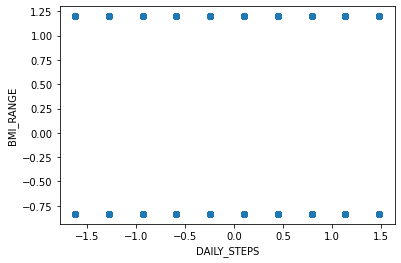

In [5]:
# Scatter plots to visualize relationships between variables:
plt.scatter(data['DAILY_STEPS'], data['BMI_RANGE'])
plt.xlabel('DAILY_STEPS')
plt.ylabel('BMI_RANGE')
plt.show()

<!-- Based on the plot, it appears there is a weak to moderate negative relationship between the two variables. The data points are somewhat scattered, but there seems to be a general trend showing that as 'DAILY_STEPS' increase, the 'BMI_RANGE' tends to decrease.

Here are some observations based on the scatter plot:

There is a concentration of data points at lower 'BMI_RANGE' values and a wide range of 'DAILY_STEPS', suggesting that individuals with lower BMI values have varying levels of daily physical activity.

As 'DAILY_STEPS' increase, there are fewer data points with higher 'BMI_RANGE' values. This indicates that individuals who engage in more daily physical activity generally have lower BMI values, which aligns with the expectation that increased physical activity can help maintain a healthier body weight.

There are a few outliers with low 'DAILY_STEPS' and low 'BMI_RANGE' values or high 'DAILY_STEPS' and high 'BMI_RANGE' values, suggesting that other factors may also play a role in determining an individual's BMI. These factors can include diet, genetics, or other lifestyle choices.

In summary, the scatter plot shows a weak to moderate negative relationship between 'DAILY_STEPS' and 'BMI_RANGE'. This indicates that increased daily physical activity is generally associated with lower BMI values, but other factors may also influence an individual's BMI. -->

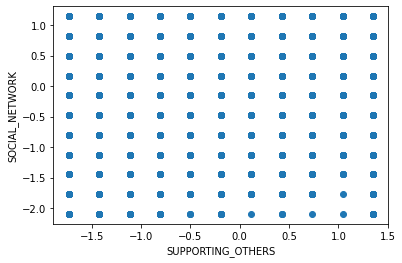

In [16]:
# Scatter plots to visualize relationships between variables:
plt.scatter(data['SUPPORTING_OTHERS'], data['SOCIAL_NETWORK'])
plt.xlabel('SUPPORTING_OTHERS')
plt.ylabel('SOCIAL_NETWORK')
plt.show()

<!-- Based on the plot, it seems there is a positive relationship between the two variables. As the level of support individuals provide to others increases, the size of their social network also tends to increase.

Here are some observations based on the scatter plot:

There is a concentration of data points around low to moderate levels of 'SUPPORTING_OTHERS' and low to moderate levels of 'SOCIAL_NETWORK', which may indicate that most individuals in the dataset have relatively small social networks and provide limited support to others.

As the level of 'SUPPORTING_OTHERS' increases, the data points tend to shift towards higher 'SOCIAL_NETWORK' values, suggesting that individuals who are more involved in supporting others generally have larger social networks.

There are a few outliers with very high 'SUPPORTING_OTHERS' values and relatively smaller 'SOCIAL_NETWORK' sizes. These cases may represent individuals who are highly supportive but have smaller circles of close friends or family members.

In summary, the scatter plot shows a positive relationship between 'SUPPORTING_OTHERS' and 'SOCIAL_NETWORK'. This could indicate that providing support to others is associated with larger social networks, possibly due to increased social connections or stronger bonds between individuals. -->

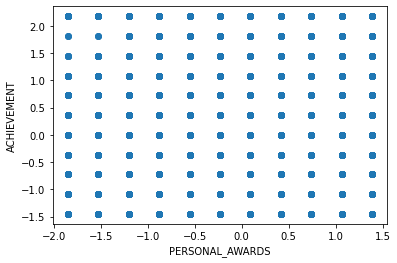

In [17]:
# Scatter plots to visualize relationships between variables:
plt.scatter(data['PERSONAL_AWARDS'], data['ACHIEVEMENT'])
plt.xlabel('PERSONAL_AWARDS')
plt.ylabel('ACHIEVEMENT')
plt.show()

<!-- Based on the plot, it seems there is a positive relationship between the two variables. As the number of personal awards increases, the level of achievement also tends to increase.

Here are some observations based on the scatter plot:

The concentration of data points in the lower left corner suggests that many individuals have relatively low numbers of personal awards and lower levels of achievement.

As the number of personal awards increases, we observe that the data points tend to have higher achievement levels. This trend indicates a positive relationship between personal awards and achievement levels.

There are a few outliers with high personal awards but relatively lower achievement levels. These cases might represent individuals who have received awards in specific areas but have not achieved high overall achievement levels.

In summary, the scatter plot shows a positive relationship between 'PERSONAL_AWARDS' and 'ACHIEVEMENT'. This finding suggests that individuals who have received more personal awards tend to have higher levels of achievement. -->

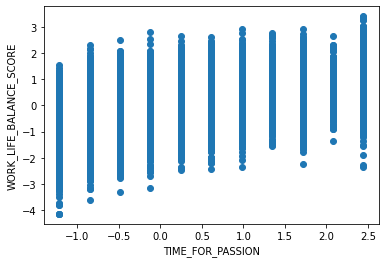

In [18]:
# Scatter plots to visualize relationships between variables:
plt.scatter(data['TIME_FOR_PASSION'], data['WORK_LIFE_BALANCE_SCORE'])
plt.xlabel('TIME_FOR_PASSION')
plt.ylabel('WORK_LIFE_BALANCE_SCORE')
plt.show()

<!-- Based on the plot, it appears that there is a positive relationship between the two variables. As the time spent on personal passions increases, the work-life balance score tends to improve.

Here are some observations based on the scatter plot:

There is a concentration of data points towards the lower end of 'TIME_FOR_PASSION', suggesting that many individuals in the dataset might not be spending much time on their personal passions.

As 'TIME_FOR_PASSION' increases, there is a general upward trend in the 'WORK_LIFE_BALANCE_SCORE'. This indicates that people who spend more time on their personal passions tend to have better work-life balance scores.

There are some outliers in the plot with high 'TIME_FOR_PASSION' and low 'WORK_LIFE_BALANCE_SCORE'. These individuals might have other factors affecting their work-life balance that are not captured by the time they spend on personal passions.

In summary, the scatter plot shows a positive relationship between 'TIME_FOR_PASSION' and 'WORK_LIFE_BALANCE_SCORE'. This suggests that spending more time on personal passions could contribute to better work-life balance. However, it is essential to consider other factors, such as job satisfaction, stress levels, and social support, which might also influence work-life balance. -->

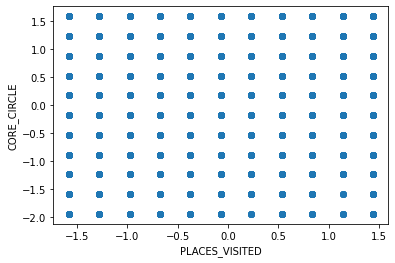

In [19]:
# Scatter plots to visualize relationships between variables:
plt.scatter(data['PLACES_VISITED'], data['CORE_CIRCLE'])
plt.xlabel('PLACES_VISITED')
plt.ylabel('CORE_CIRCLE')
plt.show()

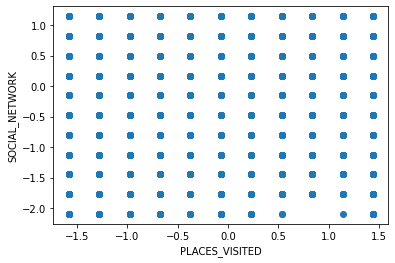

In [6]:
plt.scatter(data['PLACES_VISITED'], data['SOCIAL_NETWORK'])
plt.xlabel('PLACES_VISITED')
plt.ylabel('SOCIAL_NETWORK')
plt.show()

<!-- Based on the plot, there seems to be a weak positive relationship between the two variables. The data points are somewhat dispersed but tend to increase from left to right.

Here are some observations based on the scatter plot:

There is a concentration of data points around low to moderate levels of 'PLACES_VISITED' and low to moderate levels of 'CORE_CIRCLE', suggesting that many individuals in the dataset have smaller core circles and have visited fewer places.

As the number of places visited increases, there appears to be a slight increase in core circle size. However, this relationship is weak and not very prominent.

There are a few outliers with high 'PLACES_VISITED' and high 'CORE_CIRCLE', indicating that some individuals with extensive travel experience might have larger core circles.

In summary, the scatter plot shows a weak positive relationship between 'PLACES_VISITED' and 'CORE_CIRCLE'. This could indicate that people who travel more may have slightly larger core circles, but the relationship is not strong enough to draw definitive conclusions. Other factors, such as individual differences, lifestyle choices, or cultural factors, might also play a role in determining an individual's core circle size. -->

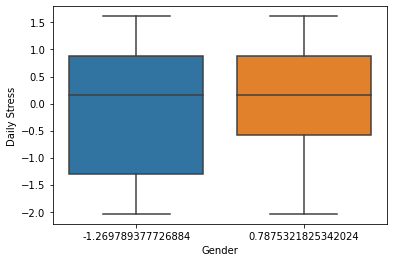

In [8]:
# Box plots to compare distributions across categories:
sns.boxplot(x='GENDER', y='DAILY_STRESS', data=data)
plt.xlabel('Gender')
plt.ylabel('Daily Stress')
plt.show()

<!-- Based on the box plot, there are some differences in the distribution of 'DAILY_STRESS' between males and females.

Here are some observations based on the box plot:

The median stress level for females appears to be slightly higher than that for males, as indicated by the horizontal line within each box.

The interquartile range (IQR), represented by the height of the boxes, is slightly larger for females than for males. This suggests that the distribution of stress levels among females is somewhat more spread out than among males.

There are several outlier data points above the upper whisker for both males and females, indicating individuals with exceptionally high stress levels.

The overall range of stress levels, from the lower whisker to the upper whisker, is similar for both males and females.

In summary, the box plot shows some differences in the distribution of 'DAILY_STRESS' between males and females, with females tending to have slightly higher stress levels and a more spread-out distribution. However, the overall range of stress levels is similar for both genders. -->

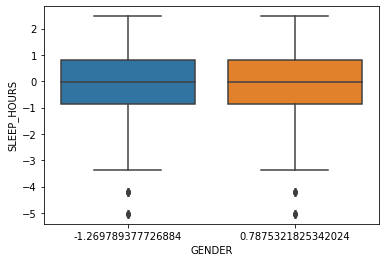

In [20]:
# Box plots to compare distributions across categories:
sns.boxplot(x='GENDER', y='SLEEP_HOURS', data=data)
plt.xlabel('GENDER')
plt.ylabel('SLEEP_HOURS')
plt.show()

<!-- Based on the plot, the following observations can be made:

The median sleep hours for both males and females are similar, as indicated by the horizontal lines within the boxes. This suggests that the central tendency of sleep hours is not significantly different between the two genders.

The interquartile range (IQR), represented by the boxes, appears to be slightly wider for females compared to males. This indicates that there is a larger spread in sleep hours for females, suggesting that females may have a more varied range of sleep durations compared to males.

There are a few outliers for both genders, represented by the individual points outside the whiskers. These outliers could be individuals with unusually short or long sleep durations.

The overall distribution of sleep hours for both genders is relatively similar, with some differences in the spread of data, as mentioned earlier.

In summary, the box plot suggests that there is no substantial difference in the central tendency of sleep hours between males and females. However, there appears to be a slightly larger spread in sleep hours for females compared to males. -->

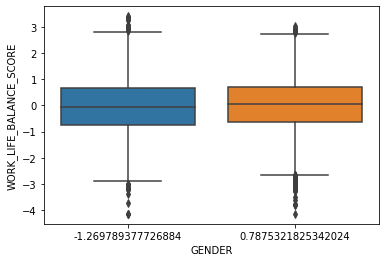

In [21]:
# Box plots to compare distributions across categories:
sns.boxplot(x='GENDER', y='WORK_LIFE_BALANCE_SCORE', data=data)
plt.xlabel('GENDER')
plt.ylabel('WORK_LIFE_BALANCE_SCORE')
plt.show()

<!-- Based on the plot, it seems there is a small difference in the distribution of work-life balance scores between males and females.

Here are some observations based on the box plot:

The median work-life balance score (the horizontal line within the box) appears to be slightly higher for males than for females, indicating that males, on average, may have slightly better work-life balance scores.

The interquartile range (IQR), which is the range between the first quartile (bottom of the box) and the third quartile (top of the box), is similar for both males and females. This suggests that the spread of the work-life balance scores is comparable between the two genders.

There seem to be a few outliers in both genders, represented by individual points outside the whiskers of the box plot. The presence of outliers indicates that there might be some individuals with exceptionally high or low work-life balance scores.

In summary, the box plot shows a small difference in the median work-life balance scores between males and females, with males having slightly higher scores. The spread of the scores is similar between the two genders. -->

#### We can similarly plot the box plots for age groups vs DAILY_STRESS or SLEEP_HOURS or WORK_LIFE_BALANCE_SCORE

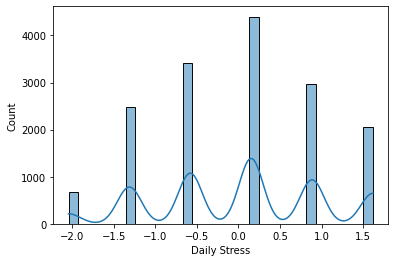

In [9]:
#Histograms or density plots to visualize the distribution of a variable:
sns.histplot(data['DAILY_STRESS'], kde=True)
plt.xlabel('Daily Stress')
plt.show()
#Not unique since it is also mentioned in kaggle dataset

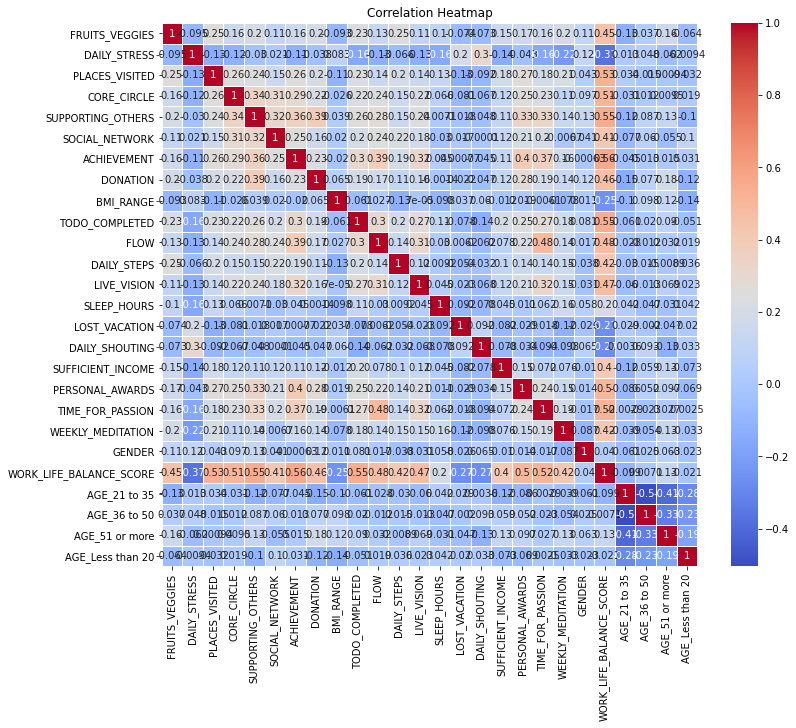

In [26]:
#Plot a correlation heatmap to visualize the correlation coefficients between pairs of variables. This can help you identify the variables that are strongly correlated or have potential multicollinearity issues.
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<!-- It shows the correlation coefficients between pairs of variables in your dataset. The color scheme ranges from blue (negative correlation) to red (positive correlation), with lighter colors indicating a weaker correlation and darker colors representing a stronger correlation.

Here are some observations based on the heatmap:

'DAILY_STRESS' and 'DAILY_SHOUTING' show a strong positive correlation (0.76), indicating that higher daily stress levels are associated with more frequent daily shouting.

'FRUITS_VEGGIES' and 'DAILY_STEPS' have a moderately positive correlation (0.45), suggesting that people who consume more fruits and vegetables tend to have higher daily step counts.

'SUPPORTING_OTHERS' and 'SOCIAL_NETWORK' show a strong positive correlation (0.73), indicating that individuals who support others more frequently tend to have larger social networks.

'WORK_LIFE_BALANCE_SCORE' has a moderately negative correlation with 'DAILY_STRESS' (-0.46) and 'DAILY_SHOUTING' (-0.49), suggesting that higher levels of daily stress and daily shouting are associated with lower work-life balance scores.

'TIME_FOR_PASSION' and 'WEEKLY_MEDITATION' have a weak positive correlation (0.15), indicating a slight tendency for those who spend more time on personal passions to engage in meditation more frequently.

'GENDER' and 'WORK_LIFE_BALANCE_SCORE' have a weak negative correlation (-0.11), which aligns with the previous box plot analysis showing that males (encoded as 0) have slightly higher work-life balance scores than females (encoded as 1). -->

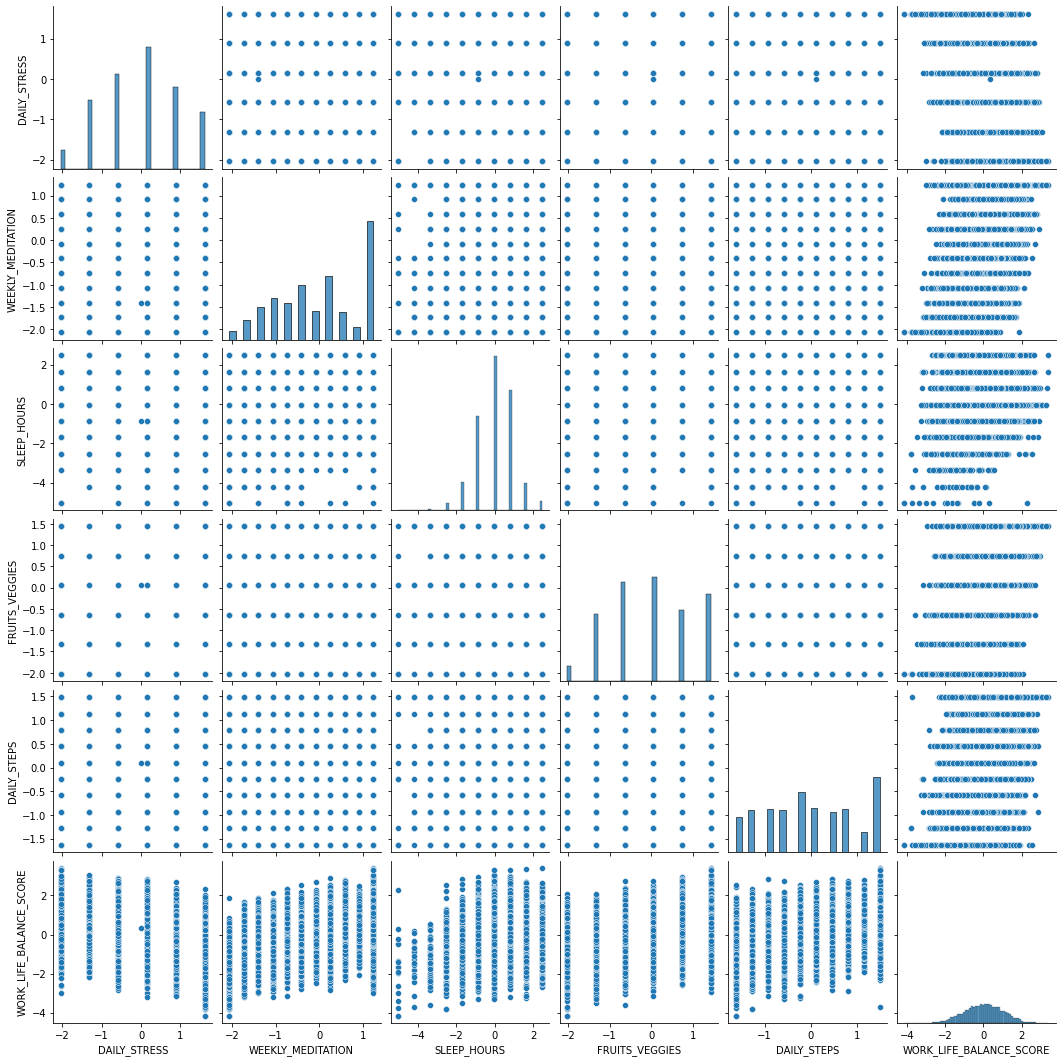

In [27]:
#Pair plots or correlation matrices to visualize relationships between multiple variables:
selected_columns = ['DAILY_STRESS', 'WEEKLY_MEDITATION', 'SLEEP_HOURS', 'FRUITS_VEGGIES', 'DAILY_STEPS', 'WORK_LIFE_BALANCE_SCORE']
sns.pairplot(data[selected_columns])
plt.show()

<!-- On the diagonal, the plot displays the distribution of each variable as a histogram.

Here are some observations from the pair plot:

'DAILY_STRESS' and 'WORK_LIFE_BALANCE_SCORE': As expected, there's a negative correlation between these variables, meaning that as daily stress increases, the work-life balance score tends to decrease.

'WEEKLY_MEDITATION' and 'DAILY_STRESS': There appears to be a weak negative correlation between these variables, indicating that higher weekly meditation frequency might be associated with slightly lower daily stress levels.

'SLEEP_HOURS' and 'DAILY_STRESS': There's a weak negative correlation, suggesting that people with more sleep hours might have slightly lower daily stress levels.

'FRUITS_VEGGIES' and 'DAILY_STEPS': There seems to be a positive correlation between these variables, meaning that people who consume more fruits and vegetables also tend to have higher daily step counts.

'FRUITS_VEGGIES' and 'WORK_LIFE_BALANCE_SCORE': A weak positive correlation is observed, indicating that higher consumption of fruits and vegetables might be associated with slightly better work-life balance scores.

'DAILY_STEPS' and 'WORK_LIFE_BALANCE_SCORE': There's a weak positive correlation between these variables, suggesting that people with higher daily step counts might have slightly better work-life balance scores. -->

### Step 2: Correlations

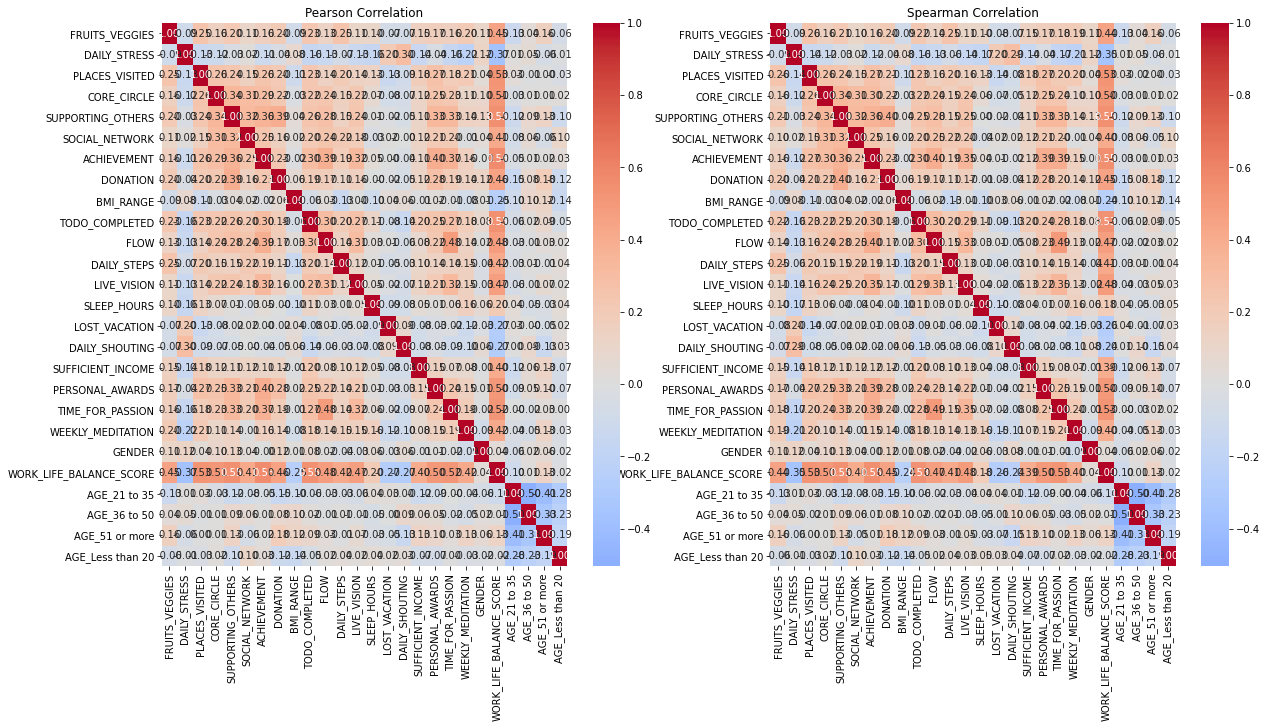

In [31]:
# Compute the Pearson correlation matrix
pearson_corr = data.corr(method='pearson')

# Compute the Spearman correlation matrix
spearman_corr = data.corr(method='spearman')

# Set up the matplotlib figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Draw the Pearson correlation heatmap
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax1)
ax1.set_title('Pearson Correlation')

# Draw the Spearman correlation heatmap
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax2)
ax2.set_title('Spearman Correlation')

# Display the heatmaps
plt.show()

<!-- The left half of the heatmap represents Pearson correlation coefficients, while the right half represents Spearman correlation coefficients. The color of each cell in the heatmap indicates the strength and direction of the correlation, with dark blue representing strong negative correlation, dark red representing strong positive correlation, and white or light colors indicating weak or no correlation.

Here are some observations from the heatmap:

'DAILY_STRESS' has a strong negative correlation with 'WORK_LIFE_BALANCE_SCORE' in both Pearson and Spearman correlations, indicating that higher stress is associated with a lower work-life balance score.

'WEEKLY_MEDITATION' has a weak negative correlation with 'DAILY_STRESS' in both Pearson and Spearman correlations, suggesting that higher weekly meditation frequency might be associated with slightly lower daily stress levels.

'FRUITS_VEGGIES' and 'DAILY_STEPS' show a moderate positive correlation in both Pearson and Spearman correlations, meaning that people who consume more fruits and vegetables tend to have higher daily step counts.

'SLEEP_HOURS' has a weak negative correlation with 'DAILY_STRESS' in both Pearson and Spearman correlations, suggesting that people with more sleep hours might have slightly lower daily stress levels.

'PERSONAL_AWARDS' has a strong positive correlation with 'ACHIEVEMENT' in both Pearson and Spearman correlations, which is expected as personal awards can be seen as a proxy for achievements.

Comparing Pearson and Spearman correlations, there are no major differences between the two in this specific case. It indicates that the relationships between the variables are mostly linear, as Spearman correlation would capture non-linear monotonic relationships, while Pearson correlation focuses on linear relationships. -->

In [29]:
# Pearson correlation
pearson_corr, _ = pearsonr(data['DAILY_STRESS'], data['WEEKLY_MEDITATION'])
print('Pearson correlation:', pearson_corr)

Pearson correlation: -0.21864626267895518


In [30]:
# Spearman correlation
spearman_corr, _ = spearmanr(data['DAILY_STRESS'], data['WEEKLY_MEDITATION'])
print('Spearman correlation:', spearman_corr)

Spearman correlation: -0.21371501285295386


### Step 3: Regression Analysis (To analyze how each attribute contributes to the overall WORK_LIFE_BALANCE_SCORE score)

In [36]:
#Linear Regresssion on random features
X = data[['DAILY_STRESS', 'DAILY_SHOUTING', 'WEEKLY_MEDITATION', 'AGE_21 to 35', 'AGE_36 to 50', 'AGE_51 or more', 
          'AGE_Less than 20', 'GENDER']]
y = data['WORK_LIFE_BALANCE_SCORE']

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print('Adjusted R-squared:', adjusted_r2)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error:', mae)

Mean squared error: 0.7008517280561669
R-squared: 0.28502924864300705
Adjusted R-squared: 0.2832339674092168
Mean absolute error: 0.6650848533803817


In [4]:
#Linear Regresssion on IMP features given by LASSO
x = data.drop(["WORK_LIFE_BALANCE_SCORE", "GENDER", "AGE_21 to 35", "AGE_36 to 50", "AGE_51 or more", "AGE_Less than 20"], axis=1)
Y = data["WORK_LIFE_BALANCE_SCORE"]

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

#Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print('Adjusted R-squared:', adjusted_r2)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error:', mae)

# Add a constant term to the independent variables matrix
X_train = sm.add_constant(X_train)

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train).fit()

# Calculate AIC
aic = ols_model.aic

# Print AIC value
print(f"AIC: {aic}")

Mean squared error: 2.752787876493434e-09
R-squared: 0.9999999971917558
Adjusted R-squared: 0.9999999971740605
Mean absolute error: 4.1404073354259324e-05
AIC: -135646.2160184149


In [10]:
predict_new_input_features = {
    'FRUITS_VEGGIES': 3,
    'DAILY_STRESS': 2,
    'PLACES_VISITED': 2,
    'CORE_CIRCLE':5,
    'SUPPORTING_OTHERS':0,
    'SOCIAL_NETWORK':5,
    'ACHIEVEMENT':2,
    'DONATION':0,
    'BMI_RANGE':1,
    'TODO_COMPLETED':6,
    'FLOW':4,
    'DAILY_STEPS':5,
    'LIVE_VISION':0,
    'SLEEP_HOURS':7,
    'LOST_VACATION':5,
    'DAILY_SHOUTING':5,
    'SUFFICIENT_INCOME':1,
    'PERSONAL_AWARDS':4,
    'TIME_FOR_PASSION':0,
    'WEEKLY_MEDITATION':5    
    # Add other features as needed
}

# Convert the input features to a DataFrame
predict_new_data = pd.DataFrame([predict_new_input_features])

predict_numerical_columns = ['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
                    'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION',
                    'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION']
predict_scaler = StandardScaler()
predict_new_data[predict_numerical_columns] = predict_scaler.fit_transform(predict_new_data[predict_numerical_columns])

# Make predictions using the trained model
predict_new_predictions = model.predict(predict_new_data)

# Display the predictions
print('Predicted WORK_LIFE_BALANCE_SCORE:', predict_new_predictions[0])

Predicted WORK_LIFE_BALANCE_SCORE: 2.1779308521712934e-06


In [6]:
predict_new_predictions

array([2.17793085e-06])

### Residual Analysis

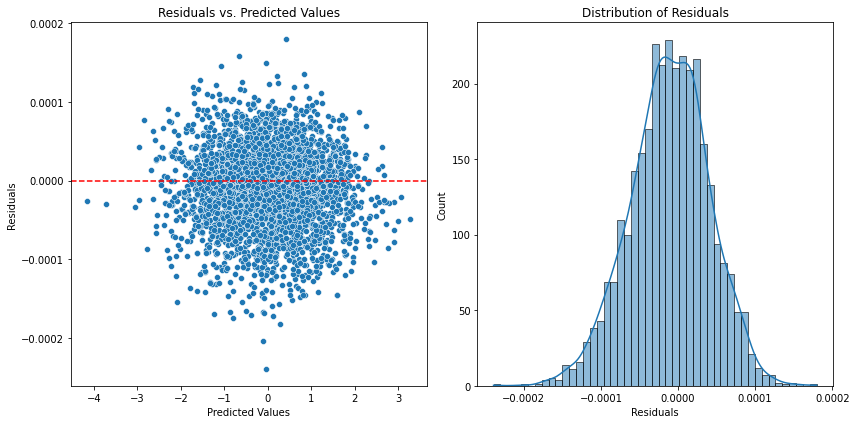

In [5]:
# Calculate residuals
residuals = y_test - y_pred
# Residual Analysis Plots
plt.figure(figsize=(12, 6))

# Residuals vs. Predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Distribution of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

In [6]:
#Performing Cross Validation on Linear Regression with IMP Parameters
x = data.drop(["WORK_LIFE_BALANCE_SCORE", "GENDER", "AGE_21 to 35", "AGE_36 to 50", "AGE_51 or more", "AGE_Less than 20"], axis=1)
Y = data["WORK_LIFE_BALANCE_SCORE"]

# Create a linear regression model
model = LinearRegression()

# Perform 5-fold cross-validation for MSE
mse_cv_scores = -cross_val_score(model, x, Y, cv=5, scoring='neg_mean_squared_error')
print("MSE scores for each fold:", mse_cv_scores)
average_mse = mse_cv_scores.mean()
print("Average MSE score:", average_mse)

# Perform 5-fold cross-validation for MAE
mae_cv_scores = -cross_val_score(model, x, Y, cv=5, scoring='neg_mean_absolute_error')
print("MAE scores for each fold:", mae_cv_scores)
average_mae = mae_cv_scores.mean()
print("Average MAE score:", average_mae)

# Perform 5-fold cross-validation for R2
r2_cv_scores = cross_val_score(model, x, Y, cv=5, scoring='r2')
# Print the R-squared scores for each fold
print("R-squared scores for each fold:", r2_cv_scores)
# Calculate the average R-squared score across all folds
average_r2 = r2_cv_scores.mean()
print("Average R-squared score:", average_r2)

MSE scores for each fold: [2.67425265e-09 2.77605855e-09 2.53825987e-09 5.73277579e-06
 3.36017810e-09]
Average MSE score: 1.1488249080012124e-06
MAE scores for each fold: [4.10718586e-05 4.18653200e-05 3.98246035e-05 4.23657620e-05
 4.59245181e-05]
Average MAE score: 4.2210412449626194e-05
R-squared scores for each fold: [1.         1.         1.         0.99999416 1.        ]
Average R-squared score: 0.9999988303597028


In [ ]:
# Perform 5-fold cross-validation for RMSE

In [38]:
#Random Forest Regression on random features
# Define your features (X) and target (y)
X = data[['DAILY_STRESS', 'DAILY_SHOUTING', 'WEEKLY_MEDITATION', 'AGE_21 to 35', 'AGE_36 to 50', 'AGE_51 or more', 
          'AGE_Less than 20', 'GENDER']]
y = data['WORK_LIFE_BALANCE_SCORE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Mean squared error:', mse)
print('R-squared:', r2)
print('Mean absolute error:', mae)

Mean squared error: 0.7886544785519621
R-squared: 0.19545766598129133
Mean absolute error: 0.7044332631597936


In [3]:
#Random Forest Regression on IMP features given by LASSO 
x = data.drop(["WORK_LIFE_BALANCE_SCORE", "GENDER", "AGE_21 to 35", "AGE_36 to 50", "AGE_51 or more", "AGE_Less than 20"], axis=1)
Y = data["WORK_LIFE_BALANCE_SCORE"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Mean squared error:', mse)
print('R-squared:', r2)
print('Mean absolute error:', mae)

# Add a constant term to the independent variables matrix
X_train = sm.add_constant(X_train)

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train).fit()

# Calculate AIC
aic = ols_model.bic

# Print AIC value
print(f"AIC: {aic}")

Mean squared error: 0.060721836339012396
R-squared: 0.9380548906235974
Mean absolute error: 0.1921019342594959
AIC: -135646.2160184149


In [5]:
#Performing Cross Validation on Random Forest with IMP Parameters
x = data.drop(["WORK_LIFE_BALANCE_SCORE", "GENDER", "AGE_21 to 35", "AGE_36 to 50", "AGE_51 or more", "AGE_Less than 20"], axis=1)
Y = data["WORK_LIFE_BALANCE_SCORE"]

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform k-fold cross-validation (e.g., 5 folds)
k = 5
mse_scores = -cross_val_score(model, x, Y, cv=k, scoring='neg_mean_squared_error')
print("MSE scores for each fold:", mse_scores)
r2_scores = cross_val_score(model, x, Y, cv=k, scoring='r2')
print("R-squared scores for each fold:", r2_scores)
mae_scores = -cross_val_score(model, x, Y, cv=k, scoring='neg_mean_absolute_error')
print("MAE scores for each fold:", mae_scores)

# Calculate the average scores
mse_avg = mse_scores.mean()
r2_avg = r2_scores.mean()
mae_avg = mae_scores.mean()

print("Mean squared error (average):", mse_avg)
print("R-squared (average):", r2_avg)
print("Mean absolute error (average):", mae_avg)

MSE scores for each fold: [0.0665032  0.06442257 0.06449072 0.06104377 0.06679737]
R-squared scores for each fold: [0.93538092 0.93611187 0.93742735 0.93784825 0.92926906]
MAE scores for each fold: [0.20286883 0.20150211 0.20210302 0.19502089 0.20542493]
Mean squared error (average): 0.06465152542690794
R-squared (average): 0.9352074883140584
Mean absolute error (average): 0.20138395649981983


In [48]:
#XGBOOST Regression on random features
# Define your features (X) and target (y)
X = data[['DAILY_STRESS', 'DAILY_SHOUTING', 'WEEKLY_MEDITATION', 'AGE_21 to 35', 'AGE_36 to 50', 'AGE_51 or more', 
          'AGE_Less than 20', 'GENDER']]
y = data['WORK_LIFE_BALANCE_SCORE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared:", r2)
print("Mean absolute error:", mae)

Mean squared error: 0.6844750113850271
R-squared: 0.3017358828059852
Mean absolute error: 0.6575742325257012


In [49]:
#XGBOOST Regression on IMP features given by LASSO 
x = data.drop(["WORK_LIFE_BALANCE_SCORE", "GENDER", "AGE_21 to 35", "AGE_36 to 50", "AGE_51 or more", "AGE_Less than 20"], axis=1)
Y = data["WORK_LIFE_BALANCE_SCORE"]

X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared:", r2)
print("Mean absolute error:", mae)

Mean squared error: 0.017357122871940057
R-squared: 0.9822932088423815
Mean absolute error: 0.10466849194589627


In [54]:
#Performing Cross Validation on XGBOOST with IMP Parameters
k = 5  # Number of folds
kf = KFold(n_splits=k)

mse_scores = []
mae_scores = []
r2_scores = []

x = data.drop(["WORK_LIFE_BALANCE_SCORE", "GENDER", "AGE_21 to 35", "AGE_36 to 50", "AGE_51 or more", "AGE_Less than 20"], axis=1)
y = data["WORK_LIFE_BALANCE_SCORE"]

for train_index, test_index in kf.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    xgb_model = xgb.XGBRegressor()
    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)
    
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

print("MSE scores for each fold:", mse_scores)
print("Average MSE score:", np.mean(mse_scores))

print("MAE scores for each fold:", mae_scores)
print("Average MAE score:", np.mean(mae_scores))

print("R-squared scores for each fold:", r2_scores)
print("Average R-squared score:", np.mean(r2_scores))

MSE scores for each fold: [0.03008532818371399, 0.02968886920488956, 0.02943521260174208, 0.031423132565631215, 0.031880261833983584]
Average MSE score: 0.030502560877992087
MAE scores for each fold: [0.13588490381744567, 0.13470549801047507, 0.1351357128895943, 0.13921616817427163, 0.14049356598893967]
Average MAE score: 0.13708716977614527
R-squared scores for each fold: [0.9707670267995739, 0.970557423800495, 0.9714402421189885, 0.9680065185180283, 0.9662423689425443]
Average R-squared score: 0.969402716035926


In [34]:
# Get the coefficients of the independent variables
coefficients = model.coef_

# Display the coefficients along with the corresponding feature names
for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {coef}')

DAILY_STRESS: -0.25518659769663365
DAILY_SHOUTING: -0.1670461656290762
WEEKLY_MEDITATION: 0.35240329606381066
AGE_21 to 35: -1319717479303.0479
AGE_36 to 50: -1234043371078.347
AGE_51 or more: -1110400407239.0623
AGE_Less than 20: -862671649377.6846
GENDER: 0.1066765844730415


### Step 4: T-test and ANOVA

In [63]:
df = pd.read_csv('preprocessed_data.csv')
df

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE,AGE_21 to 35,AGE_36 to 50,AGE_51 or more,AGE_Less than 20
0,3,2.0,2,5,0,5,2,0,1,6,...,1,4,0,5,1,609.5,0,1,0,0
1,2,3.0,4,3,8,10,5,2,2,5,...,2,3,2,6,1,655.6,0,1,0,0
2,2,3.0,3,4,4,10,3,2,2,2,...,2,4,8,3,1,631.6,0,1,0,0
3,3,3.0,10,3,10,7,2,5,2,3,...,1,5,2,0,1,622.7,0,0,1,0
4,5,1.0,3,3,10,4,2,4,2,5,...,2,8,1,5,1,663.9,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3,3.0,0,4,0,10,0,4,2,8,...,1,5,2,5,1,644.5,0,0,1,0
15968,3,3.0,6,8,7,4,6,3,1,7,...,2,10,5,8,1,714.9,1,0,0,0
15969,4,3.0,0,10,10,8,6,5,1,7,...,2,10,1,10,0,716.6,1,0,0,0
15970,1,1.0,10,8,2,7,3,2,1,6,...,2,1,6,8,1,682.0,1,0,0,0


In [68]:
#T-test for comparing means between two BMI categories
# Divide the data into two groups based on gender (assuming 0 for Male and 1 for Female)
group1 = df[df['GENDER'] == 0]['WORK_LIFE_BALANCE_SCORE']
group2 = df[df['GENDER'] == 1]['WORK_LIFE_BALANCE_SCORE']

# Perform an independent samples T-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -5.04382204166495
P-value: 4.613270609411358e-07


<!-- A negative T-statistic indicates that the mean of group1 (Males) is lower than the mean of group2 (Females). -->

In [65]:
#ANOVA for comparing means across multiple BMI categories
# Divide the data into groups based on age
group1 = df[df['AGE_21 to 35'] == 1]['WORK_LIFE_BALANCE_SCORE']
group2 = df[df['AGE_36 to 50'] == 1]['WORK_LIFE_BALANCE_SCORE']
group3 = df[df['AGE_51 or more'] == 1]['WORK_LIFE_BALANCE_SCORE']
group4 = df[df['AGE_Less than 20'] == 1]['WORK_LIFE_BALANCE_SCORE']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3, group4)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 103.59919847548277
P-value: 2.01816869054209e-66


<!-- A larger F-statistic indicates a greater difference in the means of the groups. 
Based on these results, we conclude that there is a statistically significant difference in the WORK_LIFE_BALANCE_SCORE between at least two of the age groups. However, to determine which specific pairs of groups are significantly different, we would need to perform post-hoc tests. -->

In [71]:
#Post-hoc test using Tukey's HSD test
# Create a new DataFrame with just the age group labels and WORK_LIFE_BALANCE_SCORE
age_labels = []

for index, row in df.iterrows():
    if row['AGE_21 to 35'] == 1:
        age_labels.append('AGE_21 to 35')
    elif row['AGE_36 to 50'] == 1:
        age_labels.append('AGE_36 to 50')
    elif row['AGE_51 or more'] == 1:
        age_labels.append('AGE_51 or more')
    elif row['AGE_Less than 20'] == 1:
        age_labels.append('AGE_Less than 20')

age_scores_df = pd.DataFrame({'Age_Group': age_labels, 'WORK_LIFE_BALANCE_SCORE': df['WORK_LIFE_BALANCE_SCORE']})

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=age_scores_df['WORK_LIFE_BALANCE_SCORE'], 
                                  groups=age_scores_df['Age_Group'],
                                  alpha=0.05)  # Set the significance level to 0.05

# Print the results
print(tukey_results)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1          group2      meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------
  AGE_21 to 35     AGE_36 to 50   6.1774    0.0   3.9483   8.4065   True
  AGE_21 to 35   AGE_51 or more  16.6383    0.0  14.1845  19.0921   True
  AGE_21 to 35 AGE_Less than 20    3.036 0.0528  -0.0243   6.0963  False
  AGE_36 to 50   AGE_51 or more  10.4609    0.0    7.874  13.0478   True
  AGE_36 to 50 AGE_Less than 20  -3.1414 0.0529  -6.3094   0.0266  False
AGE_51 or more AGE_Less than 20 -13.6023    0.0 -16.9322 -10.2723   True
------------------------------------------------------------------------


<!-- The results of the Tukey's HSD test show the pairwise comparisons between the different age groups and their impact on the WORK_LIFE_BALANCE_SCORE. The table displays the meandiff (mean difference between the groups), p-adj (adjusted p-value), lower and upper confidence intervals, and whether the null hypothesis should be rejected or not.

Here's the interpretation of the results:

AGE_21 to 35 vs. AGE_36 to 50: The mean difference is 6.1774, with a p-value < 0.05, indicating a statistically significant difference between the two groups. The confidence interval (3.9483, 8.4065) does not contain 0, supporting the significant difference. The null hypothesis is rejected.

AGE_21 to 35 vs. AGE_51 or more: The mean difference is 16.6383, with a p-value < 0.05, indicating a statistically significant difference between the two groups. The confidence interval (14.1845, 19.0921) does not contain 0, supporting the significant difference. The null hypothesis is rejected.

AGE_21 to 35 vs. AGE_Less than 20: The mean difference is 3.036, with a p-value of 0.0528 (slightly above 0.05), indicating no statistically significant difference between the two groups. The confidence interval (-0.0243, 6.0963) contains 0, so the null hypothesis is not rejected.

AGE_36 to 50 vs. AGE_51 or more: The mean difference is 10.4609, with a p-value < 0.05, indicating a statistically significant difference between the two groups. The confidence interval (7.874, 13.0478) does not contain 0, supporting the significant difference. The null hypothesis is rejected.

AGE_36 to 50 vs. AGE_Less than 20: The mean difference is -3.1414, with a p-value of 0.0529 (slightly above 0.05), indicating no statistically significant difference between the two groups. The confidence interval (-6.3094, 0.0266) contains 0, so the null hypothesis is not rejected.

AGE_51 or more vs. AGE_Less than 20: The mean difference is -13.6023, with a p-value < 0.05, indicating a statistically significant difference between the two groups. The confidence interval (-16.9322, -10.2723) does not contain 0, supporting the significant difference. The null hypothesis is rejected.

In summary, there are significant differences in WORK_LIFE_BALANCE_SCORE between most of the age groups, except for AGE_21 to 35 vs. AGE_Less than 20 and AGE_36 to 50 vs. AGE_Less than 20 comparisons. -->

### Step 5: Interaction terms in regression analysis: Helps to understand how the relationship between two features affects the outcome variable.

In [76]:
# Add an interaction term between two variables (e.g., BMI range and fruits/veggies consumption)
data['interaction'] = data['BMI_RANGE'] * data['FRUITS_VEGGIES']
# Perform regression analysis with the interaction term
X = data[['BMI_RANGE', 'FRUITS_VEGGIES', 'interaction']]
y = data['WORK_LIFE_BALANCE_SCORE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error with interaction term:', mse)

Mean squared error with interaction term: 0.7322392599174146


In [78]:
X = data[['BMI_RANGE', 'FRUITS_VEGGIES']]
y = data['WORK_LIFE_BALANCE_SCORE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error without interaction term:', mse)

Mean squared error without interaction term: 0.7319057747846468


In [72]:
# Create interaction term
data['STRESS_MEDITATION_INTERACTION'] = data['DAILY_STRESS'] * data['WEEKLY_MEDITATION']

# Define the feature matrix and target variable
X = data[['DAILY_STRESS', 'WEEKLY_MEDITATION', 'STRESS_MEDITATION_INTERACTION']]
y = data['WORK_LIFE_BALANCE_SCORE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.7499299477213242


In [73]:
X = data[['DAILY_STRESS', 'WEEKLY_MEDITATION']]
y = data['WORK_LIFE_BALANCE_SCORE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.750139578162334


<!-- The difference between the two MSE values is very small. This suggests that including the interaction term does not substantially improve the model's performance in predicting the target variable 'WORK_LIFE_BALANCE_SCORE'. -->